# 可視化で遊ぶ

## pandas

ちょっと長いが、まずはここを見るのが良い。
どんなクラスと関数があるかわかる
[API Reference — pandas 0.20.1 documentation](http://pandas.pydata.org/pandas-docs/stable/api.html)

### pandas.DataFrame

データを読み込んだときに最初にかえってくるデータの型

[pandas.DataFrame — pandas 0.20.1 documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame)

|function||
|:--|:--|
|DataFrame.ix (indexes, columns)| 該当範囲のデータの取り出し|
|DataFrame[a>b] ||

DataFrame.

### pandas.Series
[pandas.Series — pandas 0.20.1 documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

#### plot
[pandas.Series.plot — pandas 0.20.1 documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot)

[pandas.Series.hist — pandas 0.20.1 documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html)

### GroupBy (DataFrame, Series)

カテゴリデータをカテゴリごとにわけられる

[API Reference - GroupBy — pandas 0.20.1 documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#groupby)

#### seriesだけ

- SeriesGroupBy.unique	Return unique values in the object.
- SeriesGroupBy.value_counts([normalize, ...])	

#### DataFrameだけ
- DataFrameGroupBy.corrwith	Compute pairwise correlation between rows or columns of two DataFrame objects.
- DataFrameGroupBy.boxplot(grouped[, ...])	Make box plots from DataFrameGroupBy data.


#### plot
[pandas.core.groupby.DataFrameGroupBy.hist — pandas 0.20.1 documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.hist.html)

### グラフの種類
- Hist: 1変数の数え上げ
- Bar: 種類と数量
- Scatter: 数量同士
- Line:時間と数量


### 

In [2]:
# しつもん
## aとbのやつのx, y等をshareしたい　

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
# Pandas test
titanic = pd.read_csv("data/train.csv")
titanic_nan = titanic.dropna(subset=['Age', 'Sex', 'Pclass'])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## カテゴリごとの分類

In [9]:
titanic[['Survived','Sex', 'Pclass', 'Name']].groupby(['Survived','Sex', 'Pclass']).count()

Name
Survived Sex    Pclass      
0        female 1          3
                2          6
                3         72
         male   1         77
                2         91
                3        300
1        female 1         91
                2         70
                3         72
         male   1         45
                2         17
                3         47

In [141]:
print(len(titanic))
print(len(titanic_nan))

891
714


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c426ac8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c517b70>], dtype=object)

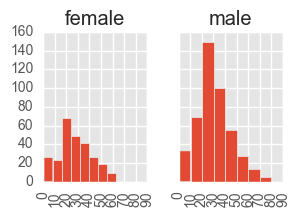

In [142]:
titanic['Age'].hist(by=titanic['Sex'], figsize=(3, 2), bins=8, sharey=True, sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122538080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1228acd68>]], dtype=object)

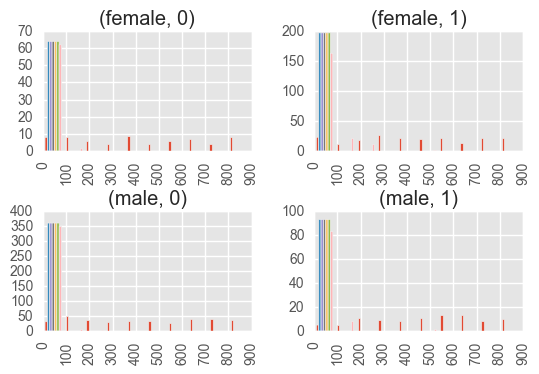

In [42]:
titanic.hist(column=['Age', 'Pclass'], by=['Sex', 'Survived'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c7acf28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cb2c3c8>]], dtype=object)

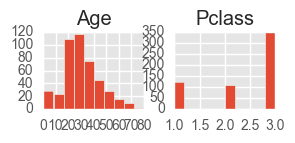

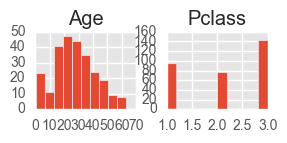

In [143]:
# df_monthly.plot.bar(y=['ad', 'ba', 'se'], alpha=0.6, figsize=(12,3))
titanic.query("Sex == 'male'").hist(column=['Pclass', 'Age',],figsize=(3, 1) )
titanic.query("Sex == 'female'").hist(column=['Pclass', 'Age',], figsize=(3, 1))

Survived
0    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
1    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
dtype: object

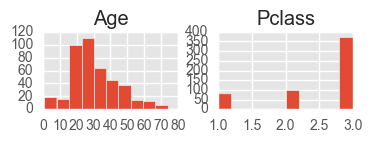

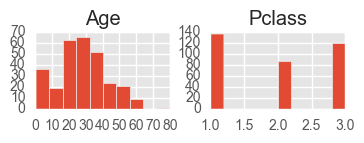

In [100]:
p[['Age', 'Pclass', 'Survived', 'Sex']].groupby('Survived').hist(figsize=(4,1))


In [144]:
titanic[['Age', 'Pclass', 'Survived', 'Sex']].groupby('Survived')
# p[["Survived", "Sex"]].groupby("Sex").

In [146]:
# <- seriesに対して使える
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [147]:
titanic[["Survived", "Sex"]].groupby("Survived").count()

,Sex
Survived,
0,549
1,342


## それぞれの項目に対して
Survived 0,1 で分布を確認したい

簡単に扱えそうなデータ　['Age', 'Pclass', 'Survived', 'Sex', 'Fare']　あたり

In [148]:
titanic.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

### まずは性別(Sex)について調べる

In [149]:
titanic.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [150]:
# p.groupby('Survived')['Sex'] <= series groupby

# DataFrameGroupBy
ss_g = titanic_nan.groupby(['Survived', 'Sex'])

# SeriesGroupBy
ss_g.Sex 

# SeriesGroupBy => Seriesにはならないの？

c.Sex.value_counts()

male      453
female    261
Name: Sex, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c0db9e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11d07eeb8>], dtype=object)

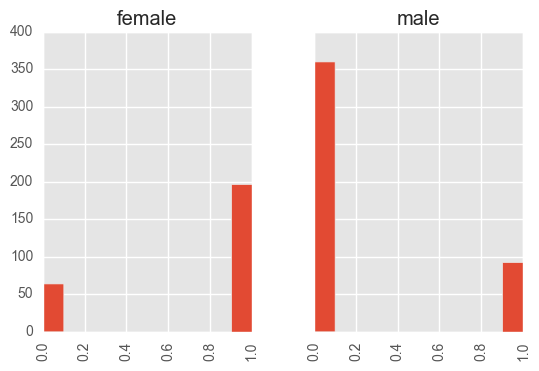

In [186]:
titanic_nan[['Survived', 'Sex']].hist(by='Sex', sharey=True)


In [221]:
# cross集計
# あとでやる
titanic_nan.pivot_table(
    # 集計したい縦のキー
       index=['Sex','Pclass'],

    # 集計したい横のキー(複数指定化)
       columns='Survived',

#     集計したい項目 (指定がなければ、上記のキーになっていない項目)
       values='Age',

    # 個数をカウントする。これがないとValuesの平均値になる。
       aggfunc='count',

    # # NaN を 0埋めする
       fill_value = 0
)

Survived         0   1
Sex    Pclass         
female 1         3  82
       2         6  68
       3        55  47
male   1        61  40
       2        84  15
       3       215  38

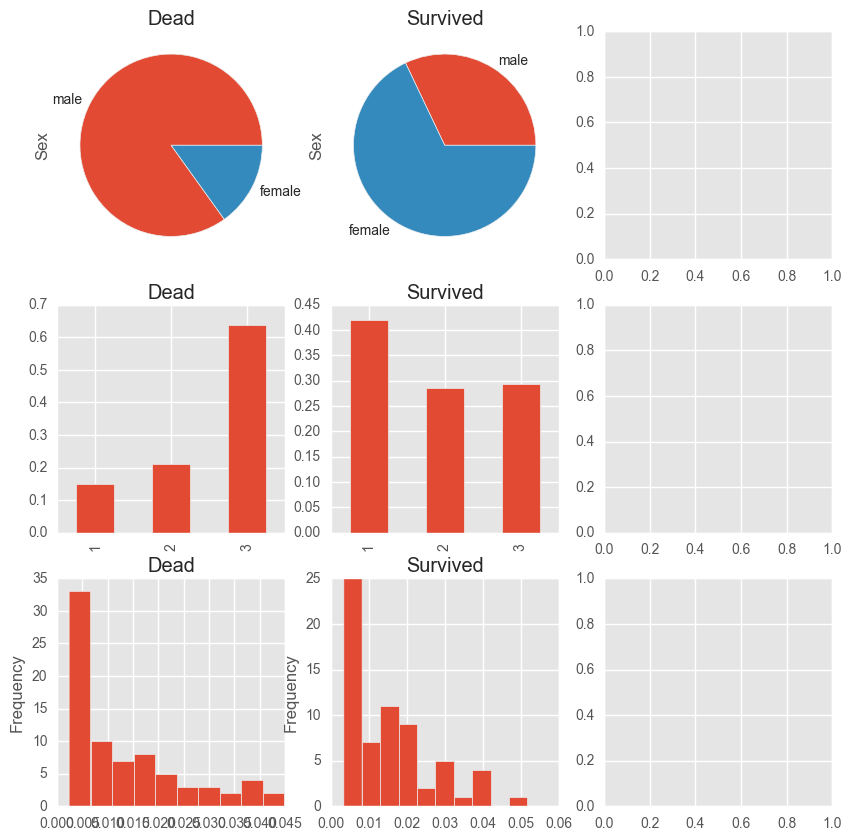

In [8]:
class DataInfo():
    def __init__(self, column, vis, continuous, category, sort=False):
        self.column = column
        self.vis = vis
        self.continuous = continuous
        self.category = category
        self.sort=sort

base_key = 'Survived'
infos = [
    DataInfo('Sex', 'pie', False, True),
    DataInfo('Pclass', 'bar', False, False),
    DataInfo('Age', 'hist', True, False,sort=True),
]
fig, axes = plt.subplots(len(infos), 3, figsize=(10, 10))

for i, info in enumerate(infos):
    for v, title in [(0, "Dead"), (1, "Survived")]:
        t = titanic_nan[titanic_nan[base_key] == v][info.column]
        ax = axes[i][v]
        t.value_counts(base_key, sort=info.sort).plot(kind=info.vis,ax=ax, title=title)
        
#     ax = axes[i][2]
#     t = titanic_nan[titanic_nan[base_key] == v].groupby()
#     t.value_counts(base_key, sort=False).plot(kind='box',ax=ax, title=title)
#     break
#         print(type(t), t)
    

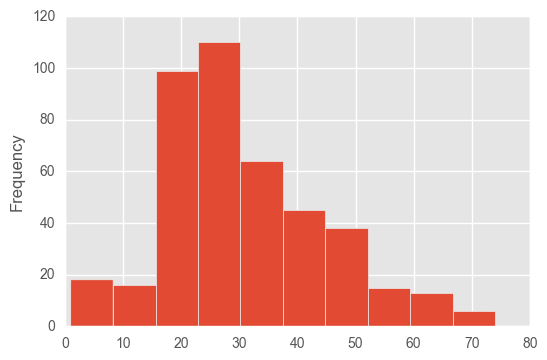

In [9]:
titanic_nan[titanic_nan.Survived == 0]['Age'].plot('hist')

In [53]:
import math
c_data = titanic[['Survived','Sex', 'Pclass']]
survived = c_data[c_data['Survived']==0].groupby(['Sex', 'Pclass'])
dead = c_data[c_data['Survived']==1].groupby(['Sex', 'Pclass'])
survived.count()


Survived
Sex    Pclass          
female 1              3
       2              6
       3             72
male   1             77
       2             91
       3            300

In [21]:
def is_child(x):
    if pd.isnull(x):
        return False
    if x > 15:
        return False
    return True

titanic_nan['Age'].apply(is_child)
titanic_nan.loc[:, 'IsChild'] = titanic_nan['Age'].apply(is_child)

c_data = titanic_nan[['Survived','Sex', 'Pclass', 'IsChild']]

survived = c_data[c_data['Survived']==0].groupby(['Sex', 'Pclass', 'IsChild'])
dead = c_data[c_data['Survived']==1].groupby(['Sex', 'Pclass', 'IsChild'])

c_data.groupby(['Sex', 'Pclass', 'IsChild']).count()

/Users/piyopiyo/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Survived
Sex    Pclass IsChild          
female 1      False          82
              True            3
       2      False          64
              True           10
       3      False          72
              True           30
male   1      False          98
              True            3
       2      False          90
              True            9
       3      False         225
              True           28

In [109]:
dead.count()

Survived
Sex    Pclass IsChild          
female 1      False          80
              True            2
       2      False          58
              True           10
       3      False          31
              True           16
male   1      False          37
              True            3
       2      False           6
              True            9
       3      False          29
              True            9

In [137]:
dict_vec = DictVectorizer()
category_dict = titanic[["Pclass", "Sex"]].to_dict('records')
category_dict

# base = titanic_nan[['Survived','Sex', 'Pclass', 'IsChild']]



[{'Pclass': 3, 'Sex': 'male'},
 {'Pclass': 1, 'Sex': 'female'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 1, 'Sex': 'female'},
 {'Pclass': 3, 'Sex': 'male'},
 {'Pclass': 3, 'Sex': 'male'},
 {'Pclass': 1, 'Sex': 'male'},
 {'Pclass': 3, 'Sex': 'male'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 2, 'Sex': 'female'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 1, 'Sex': 'female'},
 {'Pclass': 3, 'Sex': 'male'},
 {'Pclass': 3, 'Sex': 'male'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 2, 'Sex': 'female'},
 {'Pclass': 3, 'Sex': 'male'},
 {'Pclass': 2, 'Sex': 'male'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 2, 'Sex': 'male'},
 {'Pclass': 2, 'Sex': 'male'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 1, 'Sex': 'male'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 3, 'Sex': 'male'},
 {'Pclass': 1, 'Sex': 'male'},
 {'Pclass': 3, 'Sex': 'female'},
 {'Pclass': 3, 'Sex': 'male'},
 {'Pclass': 1, 'Sex': 'male'},
 {'Pclass

In [8]:
import patsy
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer

# titanic_nan[['Survived','Sex', 'Pclass', 'IsChild']]
c_df = patsy.dmatrix('C(Pclass) + C(Sex) + Age + Survived', data=titanic_nan, return_type='dataframe')

c_df.head(2)

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],Age,Survived
0,1.0,0.0,1.0,1.0,22.0,0.0
1,1.0,0.0,0.0,0.0,38.0,1.0


In [32]:
X = c_df[["C(Pclass)[T.2]","C(Pclass)[T.3]","C(Sex)[T.male]","Age"]]
Y = c_df['Survived']

model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X, Y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

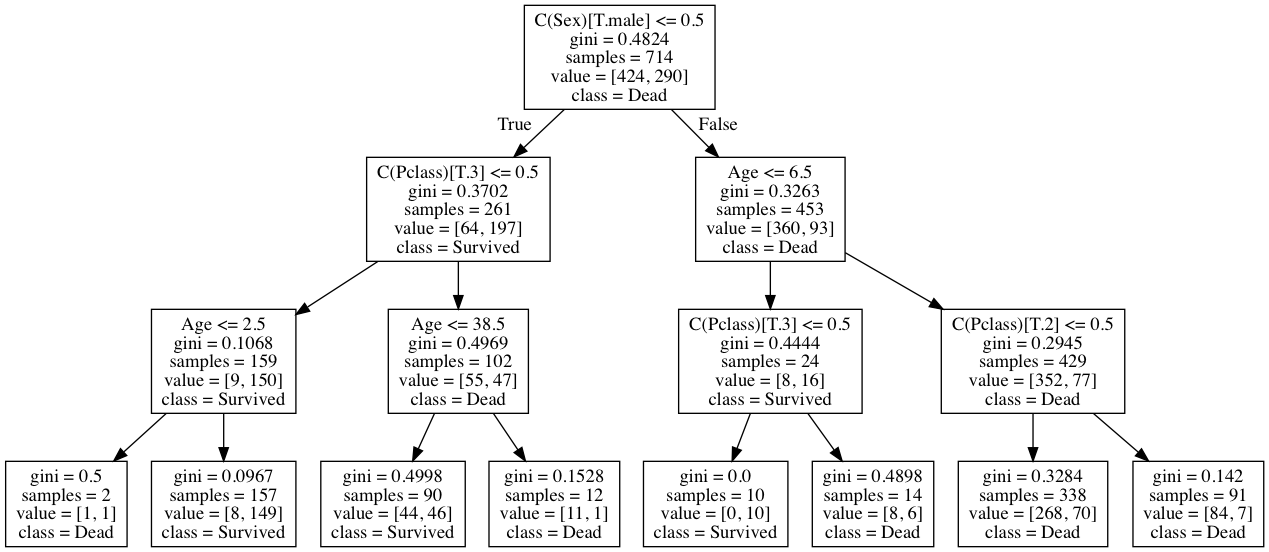

In [36]:
# 可視化
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
tree.export_graphviz(
    model,
    out_file=dot_data,
    feature_names=list(X.keys()),
    class_names=['Dead', 'Survived']
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [37]:
good = 0
for ans, predict in zip(titanic_nan['Survived'], list(model.predict(X))):
    if (ans == int(predict)):
        good += 1
        
print(good*1.0/len(titanic_nan['Survived']))

0.8081232492997199


In [38]:
test_data = pd.read_csv('data/test.csv')
test_c_df = patsy.dmatrix('C(Pclass) + C(Sex) + Age', data=titanic_nan, return_type='dataframe')
t = test_c_df[["C(Pclass)[T.2]","C(Pclass)[T.3]","C(Sex)[T.male]","Age"]]

with open('data/result2.csv', 'w') as f:
    f.write("PassengerId,Survived\n")
    for i, result in zip(test_data['PassengerId'].values , model.predict(t)):
        f.write('{},{}\n'.format(i, int(result)))
#         print(i, result)
    
# test_data['PassengerId'].values
